# Data Preparation

## Imports & Functions

In [39]:
# Establish search path and import local utilities module
""" This includes: 
    get_data_path(), get_csv_file(data_path, file_name), 
    display_file_summary(data_frame, name=""), display_file_stats(data_frame, name="")
"""
import sys
sys.path.append("/Users/stuartgow/GitHub/Python_Snippets/Utilities")
import SGfilehandling as files

# Import typically used packages
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('default')

In [2]:
# Simple Horizontal Bar Plot
def quick_plot(column):
    fig, ax = plt.subplots(figsize =(10, 5))
    counts = column.value_counts()
    bars = plt.barh(counts.index, counts.values, color='blue')
    ax.bar_label(bars, fmt='%d', padding=3) 
    plt.show()

def quick_horizontal(series):
    if not isinstance(series, list):
        series = [series]

    fig, axes = plt.subplots(nrows=1, ncols=len(series), figsize=(12,5), squeeze=False)
    axes = axes.flatten()

    for (nextSeries, nextAx) in zip(series, axes):
        counts = nextSeries.value_counts()
        bars = nextAx.barh(counts.index, counts.values, color='blue')
        nextAx.bar_label(bars, fmt='%d', padding=3) 

    plt.tight_layout()
    plt.show()

def quick_hist(series):
    if not isinstance(series, list):
        series = [series]

    fig, axes = plt.subplots(nrows=1, ncols=len(series), figsize=(12,5), squeeze=False)
    axes = axes.flatten()
    for (nextSeries, nextAx) in zip(series, axes):
        nextAx.hist(nextSeries, color='blue', width=5)

    plt.tight_layout()
    plt.show()

## Data Load

In [3]:
# CSV File Data Load to a Pandas dataframe & Initial Examination
# The 'Data' folder one level above the project 
data_path = files.get_data_path()   
file_name="wallacecommunications.csv"

df = files.get_csv_file(data_path, file_name=file_name)

print(f'File Contents. {file_name}')
display(df.head())
files.display_file_summary(df, name=file_name)
files.display_file_stats(df, name=file_name)

File Contents. wallacecommunications.csv


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


File Details. wallacecommunications.csv


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
ID,50662,0,0,50644,80354425,2,int64,0,50662,0,0,0,0
town,50662,0,0,101,London,3241,object,50662,0,0,0,0,0
country,50662,0,0,5,UK,50657,object,50662,0,0,0,0,0
age,50662,0,0,76,32,2273,int64,0,50662,0,0,0,0
job,50662,0,0,12,management,10849,object,50662,0,0,0,0,0
married,50662,0,0,3,married,30045,object,50662,0,0,0,0,0
education,50662,0,0,4,secondary,25779,object,50662,0,0,0,0,0
arrears,50662,0,0,2,no,49794,object,50662,0,0,0,0,0
current_balance,50662,0,0,6928,0.0,3836,float64,0,0,50662,0,0,0
housing,50662,0,0,2,yes,27250,object,50662,0,0,0,0,0


File Stats For Numerics. wallacecommunications.csv


,count,mean,std,min,25%,50%,75%,max
ID,50662.00,55028712.75,25985959.78,10000726.00,32499637.25,55011272.00,77488092.25,99999515.00
age,50662.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50662.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
conn_tr,50662.00,3.01,1.41,1.00,2.00,3.00,4.00,5.00
last_contact_this_campaign_day,50662.00,15.77,8.35,1.00,8.00,16.00,21.00,31.00
this_campaign,50662.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00
days_since_last_contact_previous_campaign,50662.00,42.64,102.24,-1.00,-1.00,-1.00,-1.00,871.00
contacted_during_previous_campaign,50662.00,0.64,2.36,0.00,0.00,0.00,0.00,275.00


/var/folders/wd/rhzj_w8570g_y66t6j6mh4zw0000gn/T/ipykernel_48893/879174978.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=10, ax=ax, figure=fig, color='blue')


<function matplotlib.pyplot.show(close=None, block=None)>

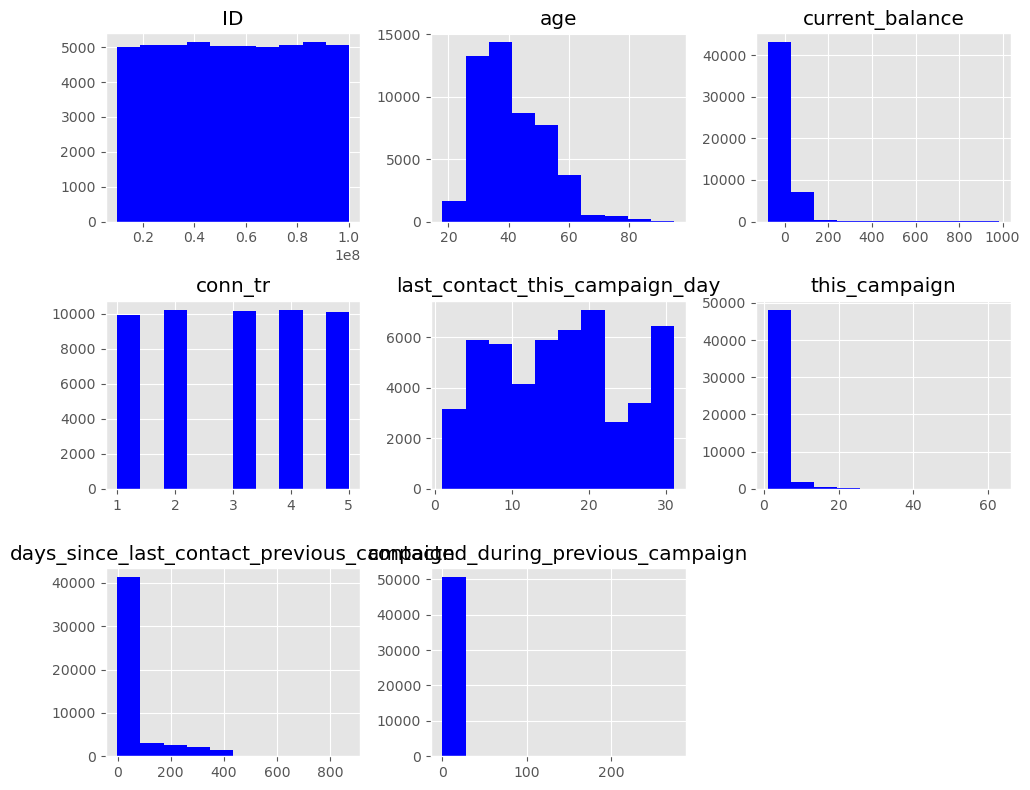

In [4]:
fig, ax = plt.subplots(figsize =(10, 8))
df.hist(bins=10, ax=ax, figure=fig, color='blue')
plt.tight_layout()
plt.show

## Data Cleaning


In [5]:
customers_cleaned = df.copy()

In [6]:
# ID - Identify duplicates - But leave as won't impact the predictions
duplicated = customers_cleaned[customers_cleaned.duplicated(keep=False, subset=['ID'])]
print(f'Duplicates: {duplicated.shape[0]}')
#display(duplicated.iloc[:, :7].sort_values(by='ID'))

Duplicates: 36


In [7]:
# Country - Some incorrect countries, change so All are UK
display(customers_cleaned[customers_cleaned['country'] != 'UK'])

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
632,79806939,Basildon,France,39,management,married,tertiary,no,5.62,no,no,cellular,3,13,sep,2,-1,0,unknown,no
658,20895885,Aberdeen,France,49,technician,divorced,secondary,no,-2.36,yes,no,unknown,1,26,may,2,-1,0,unknown,no
747,14855363,Norwich,Germany,37,management,married,tertiary,no,6.30,no,no,cellular,2,30,apr,1,87,1,success,yes
1338,74486719,Sale,USA,26,technician,single,secondary,no,12.31,yes,no,cellular,2,3,jun,2,96,5,success,yes
6746,54594566,Birmingham,Portugal,50,housemaid,married,tertiary,no,52.60,yes,no,cellular,1,24,jul,2,-1,0,unknown,no


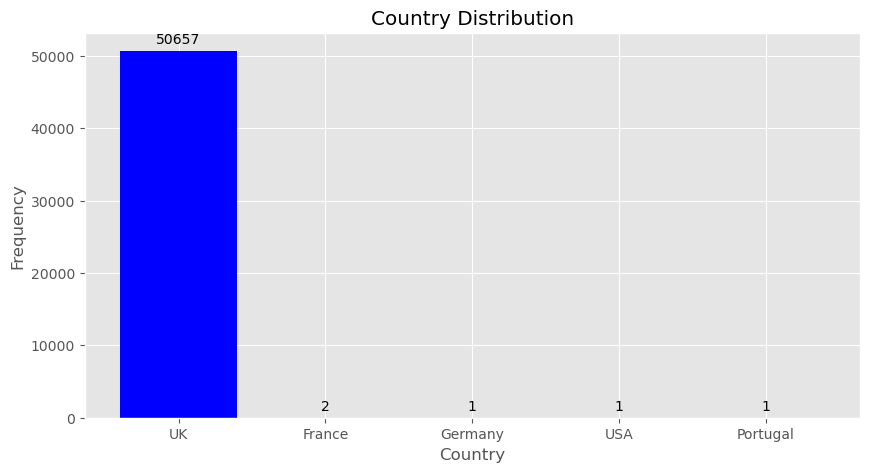

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
counts = customers_cleaned['country'].value_counts()
bars = ax.bar(counts.index, counts.values, color='blue')
ax.bar_label(bars, fmt='%d', padding=3)
ax.set(title='Country Distribution', xlabel='Country', ylabel='Frequency')    
plt.show()

In [9]:
customers_cleaned['country'] = 'UK'
display(customers_cleaned[customers_cleaned['country'] != 'UK'])

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


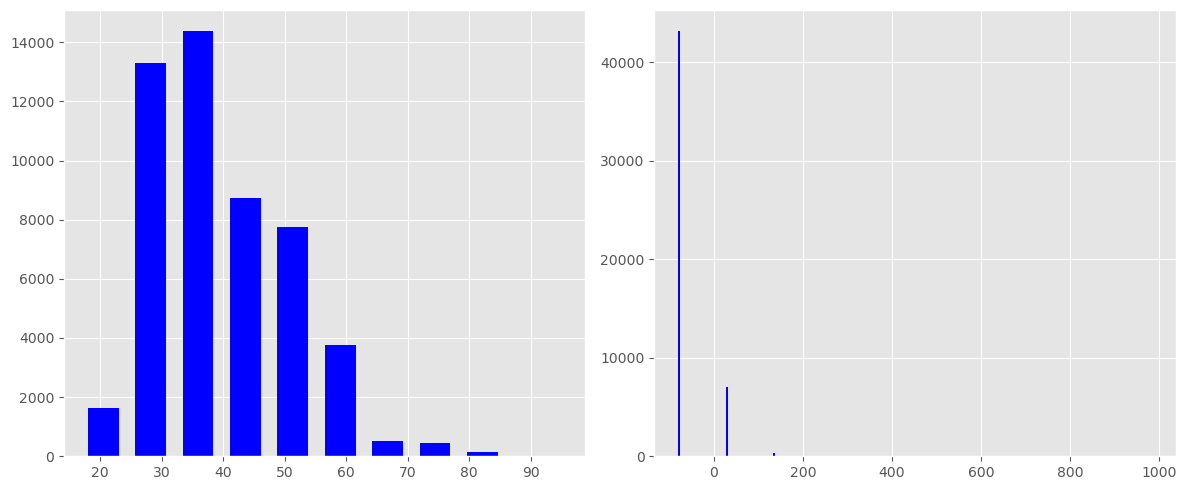

In [10]:
quick_hist([customers_cleaned['age'], customers_cleaned['current_balance']])

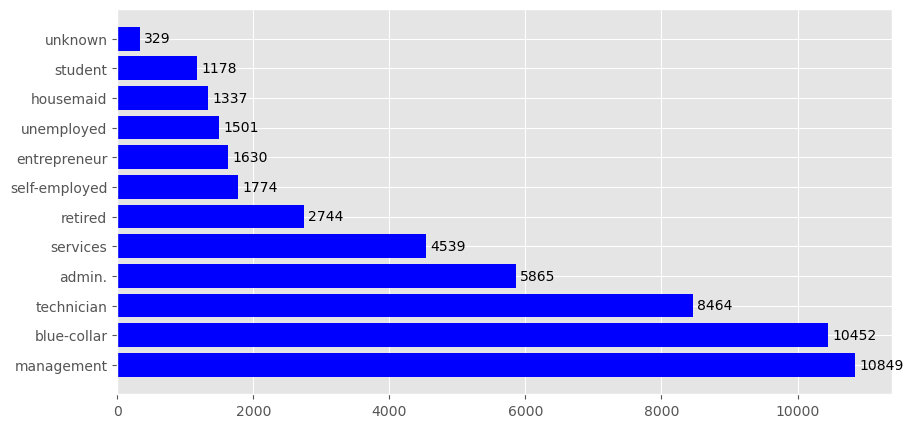

In [11]:
quick_plot(customers_cleaned['job'])

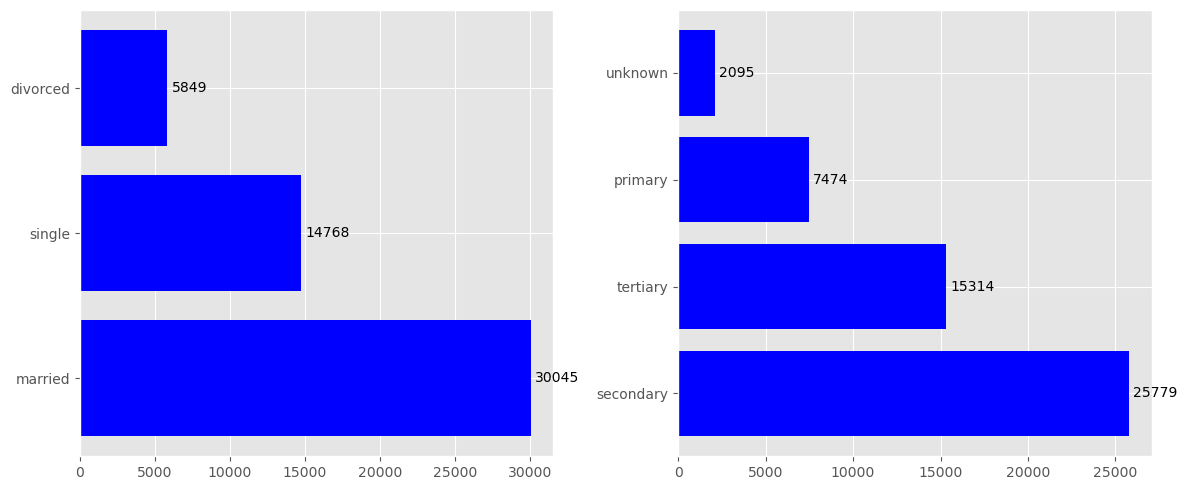

In [12]:
quick_horizontal([customers_cleaned['married'], customers_cleaned['education']])

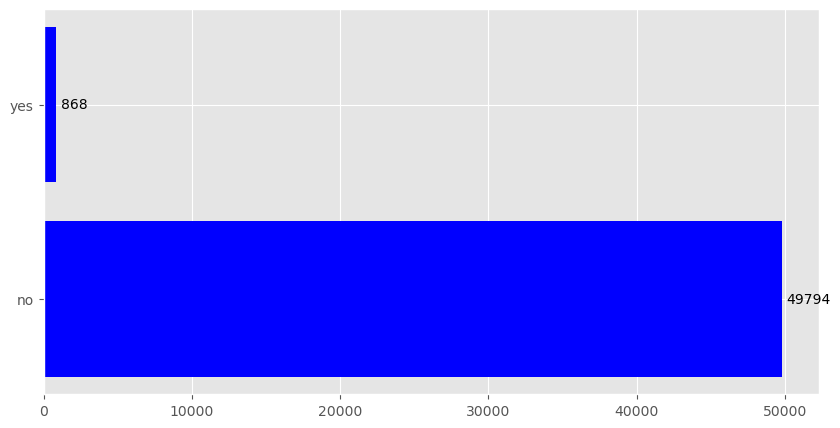

In [13]:
quick_plot(customers_cleaned['arrears'])

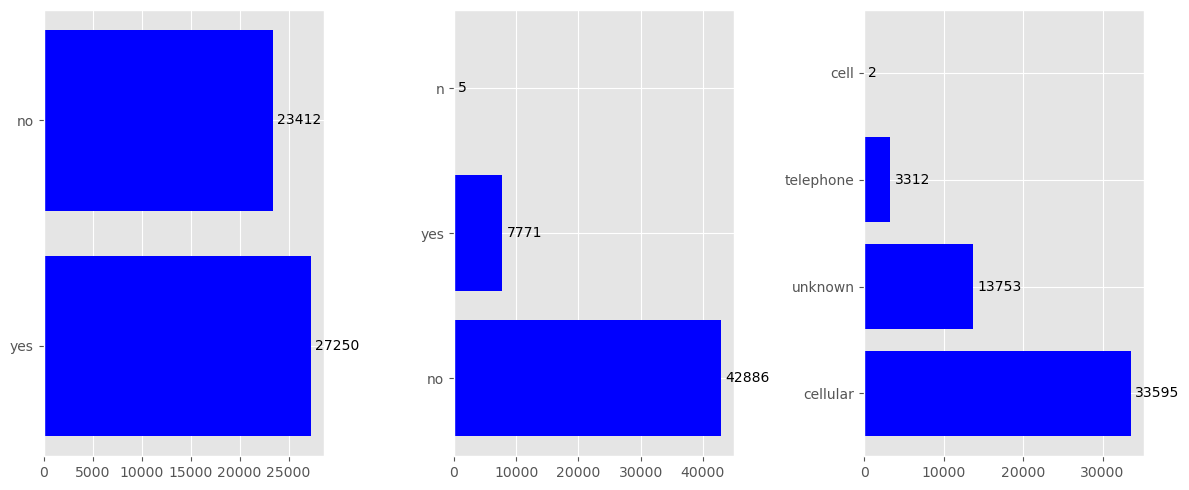

In [14]:
quick_horizontal([customers_cleaned['housing'], customers_cleaned['has_tv_package'], customers_cleaned['last_contact']])

In [15]:
display(customers_cleaned[customers_cleaned['has_tv_package'] == 'n'])


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
18,23771239,Milton Keynes,UK,32,management,married,tertiary,no,0.62,yes,n,telephone,2,13,nov,1,-1,0,unknown,no
971,56724125,Cheltenham,UK,34,technician,married,tertiary,no,1.97,no,n,cellular,2,20,aug,3,-1,0,unknown,yes
3106,40345744,Bristol,UK,30,management,single,tertiary,no,5.72,no,n,cellular,5,17,jun,3,183,2,success,yes
4782,96633301,Leicester,UK,60,retired,divorced,secondary,no,0.01,no,n,cellular,3,19,feb,1,184,1,success,yes
7548,86728502,Birmingham,UK,75,retired,married,primary,no,33.24,no,n,cellular,1,2,feb,1,-1,0,unknown,no


In [16]:
customers_cleaned['has_tv_package'] = customers_cleaned['has_tv_package'].replace('n', 'no')
display(customers_cleaned[customers_cleaned['has_tv_package'] == 'n'])

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


In [17]:
display(customers_cleaned[customers_cleaned['last_contact'] == 'cell'])


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
853,33899229,Southend-on-Sea,UK,26,management,single,tertiary,no,0.45,no,no,cell,4,10,jul,3,-1,0,unknown,yes
4827,76998373,Barnsley,UK,30,student,single,secondary,no,16.81,no,no,cell,5,7,dec,2,-1,0,unknown,yes


In [18]:
customers_cleaned['last_contact'] = customers_cleaned['last_contact'].replace('cell', 'cellular')
display(customers_cleaned[customers_cleaned['last_contact'] == 'cell'])

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


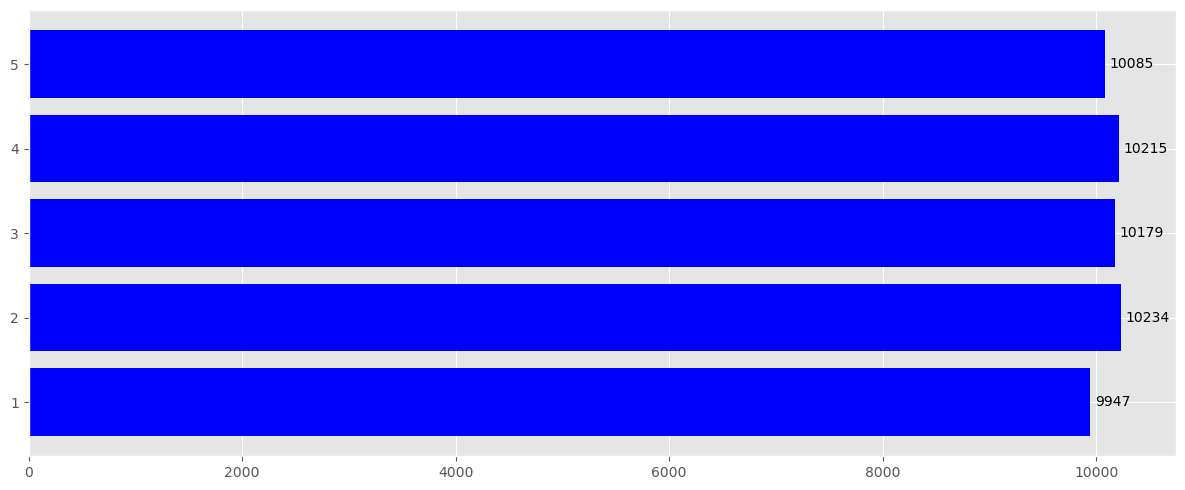

In [35]:
quick_horizontal([customers_cleaned['conn_tr']])

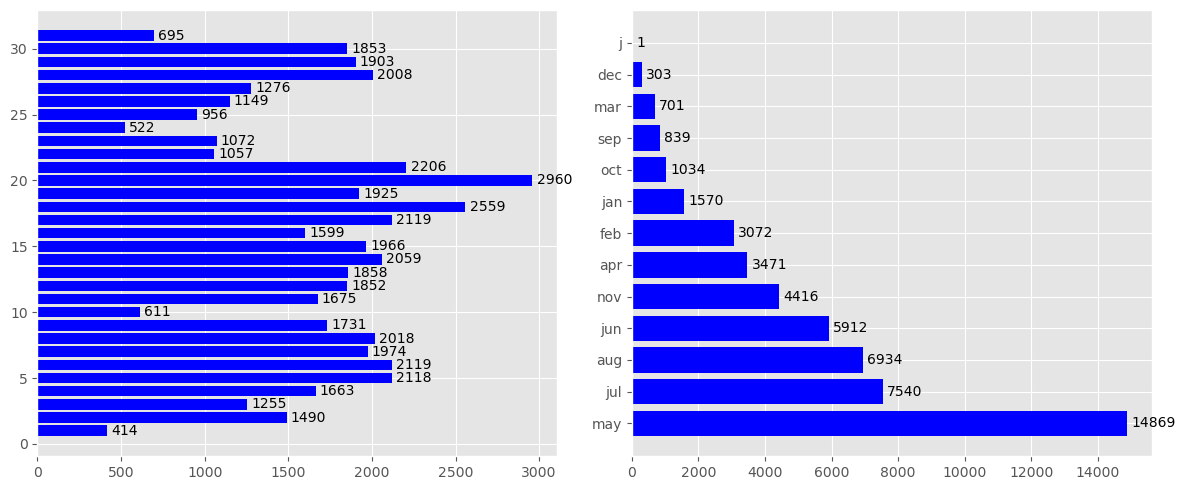

In [20]:
quick_horizontal([customers_cleaned['last_contact_this_campaign_day'], customers_cleaned['last_contact_this_campaign_month']])

In [21]:
display(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'])


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
3513,56786748,Wigan,UK,32,technician,married,secondary,no,5.6,no,no,cellular,4,6,j,4,-1,0,unknown,yes


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


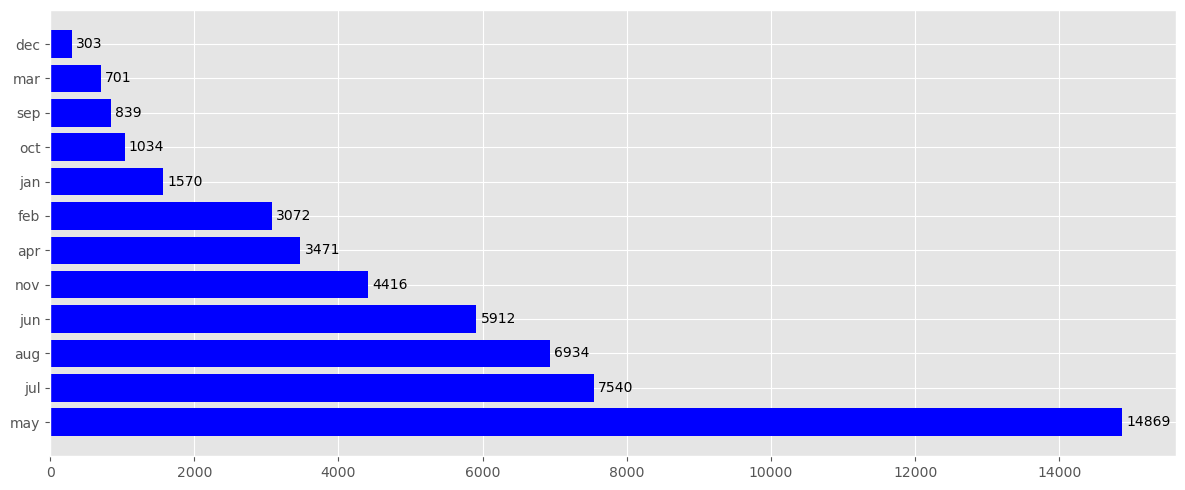

In [22]:
customers_cleaned.drop(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'].index, inplace=True)
display(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'])
quick_horizontal([customers_cleaned['last_contact_this_campaign_month']])

In [23]:
display(customers_cleaned[customers_cleaned['this_campaign'].map(customers_cleaned['this_campaign'].value_counts()) == 1])


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
14806,97951268,Hastings,UK,49,blue-collar,married,primary,no,3.71,yes,no,cellular,2,31,jul,44,-1,0,unknown,no
20256,17048885,Hastings,UK,34,management,married,tertiary,no,0.04,yes,no,cellular,3,31,jul,39,-1,0,unknown,no
22373,83499604,Nuneaton,UK,28,blue-collar,single,secondary,no,2.35,yes,no,unknown,5,16,jun,46,-1,0,unknown,no
34515,44739760,Basildon,UK,35,technician,married,secondary,no,4.32,yes,no,unknown,5,21,may,55,-1,0,unknown,no
41778,84442780,Bedford,UK,30,management,single,tertiary,no,3.58,yes,no,unknown,2,19,may,51,-1,0,unknown,no
48779,34156246,Leicester,UK,24,technician,single,primary,no,1.26,yes,no,unknown,1,20,jun,58,-1,0,unknown,no


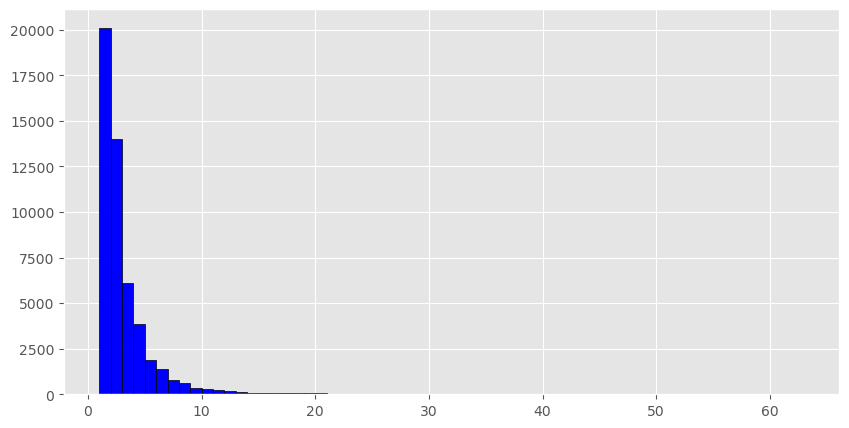

No Contacts: 0 Contacts <= 10: 49380 and over: 1281. So 2.53%


In [24]:
bin_width = 1
bins = np.arange(min(customers_cleaned['this_campaign']), max(customers_cleaned['this_campaign']) + bin_width, bin_width)
fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['this_campaign'], bins=bins, color='blue', edgecolor='black')
plt.show()

no_contacts = (customers_cleaned['this_campaign'] <= 0).sum()
under_10 = (customers_cleaned['this_campaign'] <= 10).sum()
over_10 = (customers_cleaned['this_campaign'] > 10).sum()

print(f'No Contacts: {no_contacts} Contacts <= 10: {under_10} and over: {over_10}. So {100 * over_10/(under_10 + over_10):.2f}%')

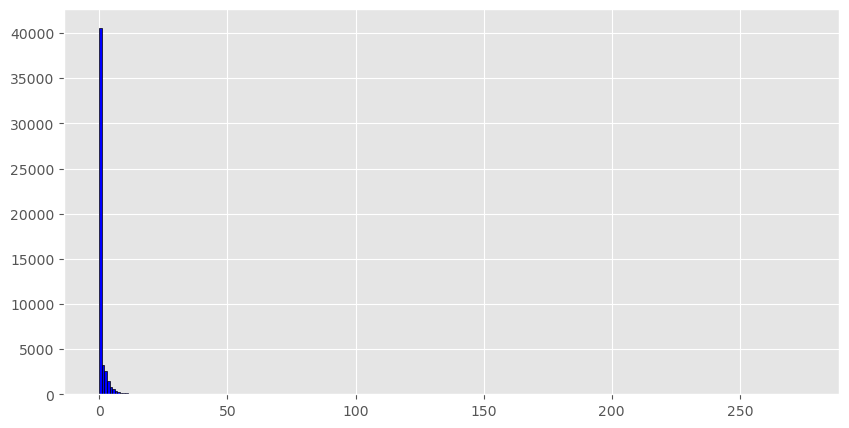

No Contacts: 40607 Contacts <= 10: 9695 and over: 359. So 3.57%


In [25]:
bin_width = 1
bins = np.arange(min(customers_cleaned['contacted_during_previous_campaign']), max(customers_cleaned['contacted_during_previous_campaign']) + bin_width, bin_width)
fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['contacted_during_previous_campaign'], bins=bins, color='blue', edgecolor='black')
plt.show()

no_contacts = (customers_cleaned['contacted_during_previous_campaign'] <= 0).sum()
under_10 = ((customers_cleaned['contacted_during_previous_campaign'] > 0) & 
            (customers_cleaned['contacted_during_previous_campaign'] <= 10)).sum()
over_10 = (customers_cleaned['contacted_during_previous_campaign'] > 10).sum()

print(f'No Contacts: {no_contacts} Contacts <= 10: {under_10} and over: {over_10}. So {100 * over_10/(under_10 + over_10):.2f}%')


In [26]:
display(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] > 60])


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
18815,81248020,Bournemouth,UK,40,management,married,tertiary,no,5.43,yes,no,cellular,3,2,feb,2,262,275,other,no


In [27]:
customers_cleaned.drop(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] > 60].index, inplace=True)
display(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] > 60])

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


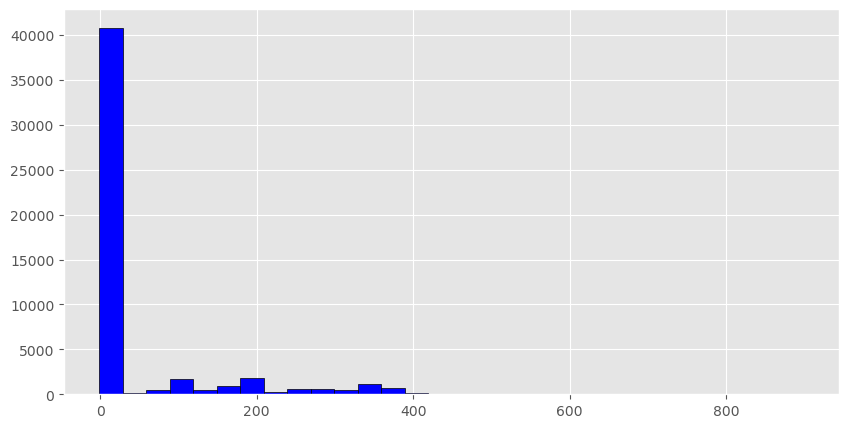

No Contacts: 40607 Contacts over 400: 347.


In [28]:
bin_width = 30
bins = np.arange(min(customers_cleaned['days_since_last_contact_previous_campaign']), max(customers_cleaned['days_since_last_contact_previous_campaign']) + bin_width, bin_width)
fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['days_since_last_contact_previous_campaign'], bins=bins, color='blue', edgecolor='black')
plt.show()

no_contacts = (customers_cleaned['days_since_last_contact_previous_campaign'] == -1).sum()
over_400 = (customers_cleaned['days_since_last_contact_previous_campaign'] >= 400).sum()
print(f'No Contacts: {no_contacts} Contacts over 400: {over_400}.')


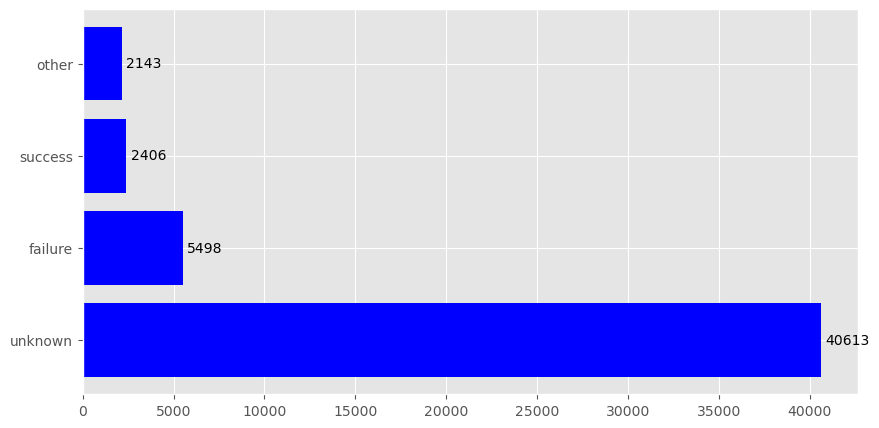

In [29]:
quick_plot(customers_cleaned['outcome_previous_campaign'])

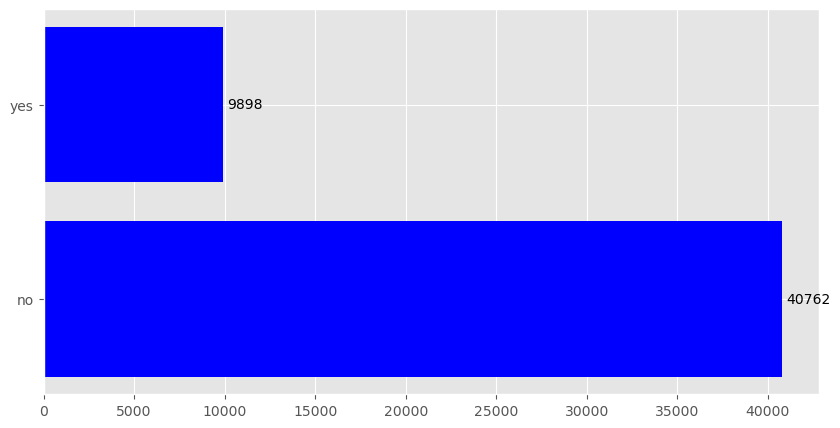

In [30]:
quick_plot(customers_cleaned['new_contract_this_campaign'])

## Draft - Before and after table of variables with discrete, continuous, categorical identification

## Feature Selection


In [63]:
# Filter the cleaned dataset, to drop unwanted features

customers_filtered = customers_cleaned.copy()

drop_features = ['country', 'conn_tr',
        'days_since_last_contact_previous_campaign', 'contacted_during_previous_campaign', 'outcome_previous_campaign']
customers_filtered.drop(drop_features, axis=1, inplace=True)

display(customers_filtered.head())
files.display_file_summary(customers_filtered)
files.display_file_stats(customers_filtered)

,ID,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,new_contract_this_campaign
0,32390233,Bristol,39,management,married,tertiary,no,-1.90,no,yes,unknown,11,jun,8,yes
1,41226029,Basildon,53,housemaid,married,primary,no,3.62,no,no,cellular,28,jul,2,yes
2,85498057,Blackburn,79,retired,divorced,primary,no,27.87,no,no,telephone,13,jul,1,yes
3,76539627,Oldham,43,services,single,secondary,no,5.50,yes,no,cellular,13,may,2,no
4,76290986,Middlesbrough,35,technician,single,secondary,no,3.44,no,no,cellular,27,aug,16,yes


File Details. 


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
ID,50660,0,0,50642,68772017,2,int64,0,50660,0,0,0,0
town,50660,0,0,101,London,3241,object,50660,0,0,0,0,0
age,50660,0,0,76,32,2272,int64,0,50660,0,0,0,0
job,50660,0,0,12,management,10848,object,50660,0,0,0,0,0
married,50660,0,0,3,married,30043,object,50660,0,0,0,0,0
education,50660,0,0,4,secondary,25778,object,50660,0,0,0,0,0
arrears,50660,0,0,2,no,49792,object,50660,0,0,0,0,0
current_balance,50660,0,0,6928,0.0,3836,float64,0,0,50660,0,0,0
housing,50660,0,0,2,yes,27249,object,50660,0,0,0,0,0
has_tv_package,50660,0,0,2,no,42889,object,50660,0,0,0,0,0


File Stats For Numerics. 


,count,mean,std,min,25%,50%,75%,max
ID,50660.00,55028160.49,25986210.45,10000726.00,32499210.00,55009891.00,77487646.75,99999515.00
age,50660.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50660.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
last_contact_this_campaign_day,50660.00,15.77,8.35,1.00,8.00,16.00,21.00,31.00
this_campaign,50660.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00


## Training & Validation & Test Split

In [64]:
# Separate features (X) and target variable (y)
targetName="new_contract_this_campaign"
featureNames=customers_filtered.columns[customers_filtered.columns != targetName]

X = customers_filtered[featureNames]
y = customers_filtered[targetName]

# 

In [65]:
# Split of training and testing data, 80:20. And training into training and validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [87]:
# Use Column transformer to establish a repeatable setup for the data prep required

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

#categorical_features = ['married', 'housing']
#numerical_features = ['age']
numerical_ix = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_ix if col != 'ID']
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

print(numerical_features)
print(categorical_features)

transformations = [
    ('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_features), 
    ('num', StandardScaler(), numerical_features)
    #('num', MinMaxScaler(), numerical_features)
    ]
col_transform = ColumnTransformer(transformers=transformations)
col_transform.fit(X_train)


['age', 'current_balance', 'last_contact_this_campaign_day', 'this_campaign']
Index(['town', 'job', 'married', 'education', 'arrears', 'housing',
       'has_tv_package', 'last_contact', 'last_contact_this_campaign_month'],
      dtype='object')


ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='infrequent_if_exist'),
                                 Index(['town', 'job', 'married', 'education', 'arrears', 'housing',
       'has_tv_package', 'last_contact', 'last_contact_this_campaign_month'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 ['age', 'current_balance',
                                  'last_contact_this_campaign_day',
                                  'this_campaign'])])

In [85]:
X_train_encoded = col_transform.transform(X_train)
display(X_train_encoded.shape)
display(col_transform.get_feature_names_out())

(32422, 136)

array(['cat__town_Barnsley', 'cat__town_Basildon',
       'cat__town_Basingstoke', 'cat__town_Bath', 'cat__town_Bedford',
       'cat__town_Belfast', 'cat__town_Birkenhead',
       'cat__town_Birmingham', 'cat__town_Blackburn',
       'cat__town_Blackpool', 'cat__town_Bolton', 'cat__town_Bournemouth',
       'cat__town_Bradford', 'cat__town_Brighton', 'cat__town_Bristol',
       'cat__town_Cambridge', 'cat__town_Cardiff', 'cat__town_Chelmsford',
       'cat__town_Cheltenham', 'cat__town_Chester',
       'cat__town_Chesterfield', 'cat__town_Colchester',
       'cat__town_County Down', 'cat__town_Coventry', 'cat__town_Crawley',
       'cat__town_Darlington', 'cat__town_Derby', 'cat__town_Doncaster',
       'cat__town_Dundee', 'cat__town_Eastbourne', 'cat__town_Edinburgh',
       'cat__town_Exeter', 'cat__town_Gateshead', 'cat__town_Gillingham',
       'cat__town_Glasgow', 'cat__town_Gloucester', 'cat__town_Grimsby',
       'cat__town_Halifax', 'cat__town_Hartlepool', 'cat__town_Hastings'

## Model Training

In [93]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', penalty='l2')
log_reg.fit(X_train_encoded, y_train)


LogisticRegression(solver='liblinear')

In [95]:
X_test_encoded = col_transform.transform(X_test)
display(X_test_encoded.shape)
display(col_transform.get_feature_names_out())

(10132, 136)

array(['cat__town_Barnsley', 'cat__town_Basildon',
       'cat__town_Basingstoke', 'cat__town_Bath', 'cat__town_Bedford',
       'cat__town_Belfast', 'cat__town_Birkenhead',
       'cat__town_Birmingham', 'cat__town_Blackburn',
       'cat__town_Blackpool', 'cat__town_Bolton', 'cat__town_Bournemouth',
       'cat__town_Bradford', 'cat__town_Brighton', 'cat__town_Bristol',
       'cat__town_Cambridge', 'cat__town_Cardiff', 'cat__town_Chelmsford',
       'cat__town_Cheltenham', 'cat__town_Chester',
       'cat__town_Chesterfield', 'cat__town_Colchester',
       'cat__town_County Down', 'cat__town_Coventry', 'cat__town_Crawley',
       'cat__town_Darlington', 'cat__town_Derby', 'cat__town_Doncaster',
       'cat__town_Dundee', 'cat__town_Eastbourne', 'cat__town_Edinburgh',
       'cat__town_Exeter', 'cat__town_Gateshead', 'cat__town_Gillingham',
       'cat__town_Glasgow', 'cat__town_Gloucester', 'cat__town_Grimsby',
       'cat__town_Halifax', 'cat__town_Hartlepool', 'cat__town_Hastings'

In [97]:
print("Test Accuracy =",log_reg.score(X_test_encoded, y_test))

Test Accuracy = 0.8258981444926964


In [96]:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X_test_encoded)
confusion_matrix(y_test, y_pred)

array([[7959,  225],
       [1539,  409]])

Accuracy: 0.8258981444926964
Precision: 0.6451104100946372
Specificity: 0.9725073313782991
Hamming Loss 0.1741018555073036
ROC-AUC Score 0.7465393297584709


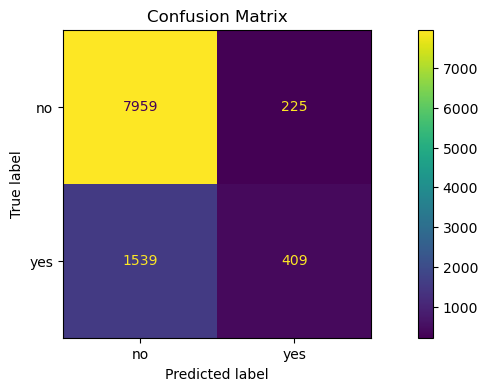

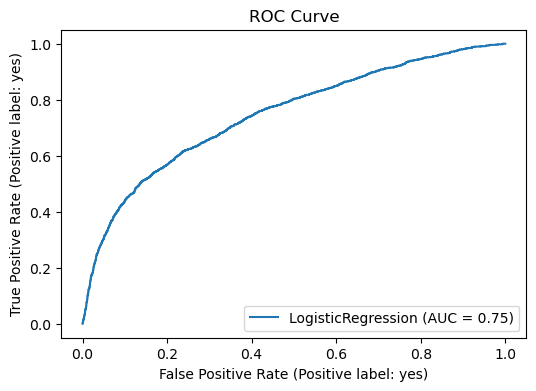

In [107]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.style.use('default')

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print various metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Precision: {metrics.precision_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
#print(f'Recall: {metrics.recall_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
#print(f'F1 Score {metrics.f1_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'Specificity: {tn / (tn + fp)}')
print(f'Hamming Loss {metrics.hamming_loss(y_true=y_test, y_pred=y_pred)}')


# Plot Confusion Matrix
class_labels = log_reg.classes_
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(ax=ax)
plt.show

# Plot the ROC curve
y_probabilities = log_reg.predict_proba(X_test_encoded)[:, 1]
print(f'ROC-AUC Score {metrics.roc_auc_score(y_true=y_test, y_score=y_probabilities)}')
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('ROC Curve')
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test_encoded, y_test, ax=ax, pos_label="yes")
plt.show()

In [89]:
# import decision tree from sklearn
from sklearn import tree

# create and train the model
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train_encoded, y_train)

In [90]:
# import cross validation function
from sklearn.model_selection import cross_val_score

# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them 
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(tree_clf, X_train_encoded, y_train, cv=5)

# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

cv_scores mean: 0.7917152856423284


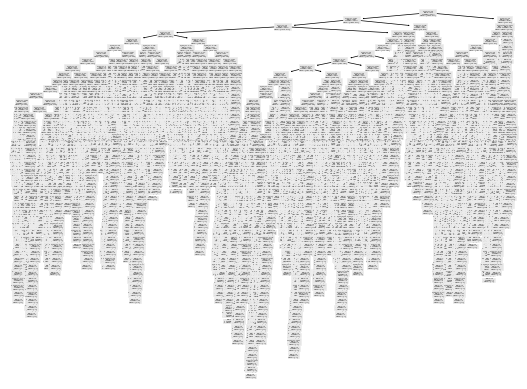

In [92]:
tree.plot_tree(tree_clf); # could just call this on its own to display the tree here

# these lines will save the tree so you can view it outside the browser
import matplotlib.pyplot as plt
plt.savefig('tree.svg',format='svg',bbox_inches = "tight")

In [91]:
# make some predictions on unseen data
y_pred = tree_clf.predict(X_test)

# calculate accuracy of the predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

/opt/anaconda3/envs/ml_packages_v3/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Bristol'

## TBD

In [ ]:
# Analysis to identify features desired
correlation_matrix = customers_cleaned.corr(numeric_only=True)
display(correlation_matrix)

In [ ]:
# Possible need to encode the target 
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
